In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
particlesDict = {}

In [3]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [4]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [5]:
def getKey(my_value,d):    
    return next(key for key, value in d.items() if value == my_value)

In [6]:
def event_selector(nmin = 0, nmax = 1e5, dictionary = {}):
    eventDict = {}
    for key in dictionary:
        if dictionary[key] <= nmax and dictionary[key] >= nmin:
            eventDict[key] = dictionary[key]
        
    return eventDict

In [7]:
def cleaner(f_ptc):
    f_ptc = np.sort(f_ptc)
    final = [f_ptc[0]]
    count = [1]
    j = 0
    for i in range(len(f_ptc)-1):
        if f_ptc[i+1] != f_ptc[i]:
            final.append(f_ptc[i+1])
            count.append(1)
            j+=1
        else:
            count[j] += 1
        
            
    return final, count
            
            


In [8]:
#Neutrinos in the output are given by adding or removing 'and abs(ptc.id) != 12 and abs(ptc.id) != 14 and abs(ptc.id) != 16' after ptc.status > 0
def dictCategories(file_name):
    
    eventDict = {'$e^+$$e^-$':0 ,'$\\bar{\\nu}_\\tau$ ou $\\nu_\\tau$':0,'Others leptons':0, 'Olnly Hadrons':0, '2$\\gamma$':0}
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = []
        electron = False
        nuTau = False
        lepton = False
        for ptc in e.particles:
            if ptc.status > 0:
                f_ptc.append(ptc.id)
                if abs(ptc.id) == 16:
                    nuTau = True
                elif abs(ptc.id) in [12,13,14]:
                    lepton = True
                elif abs(ptc.id) == 11:
                    electron = True
                
        if electron == True:
            eventDict['$e^+$$e^-$'] +=1
        elif f_ptc == [22,22]:
            eventDict['2$\\gamma$'] +=1
        elif nuTau == True:
            eventDict['$\\bar{\\nu}_\\tau$ ou $\\nu_\\tau$'] += 1
        elif lepton == True:
            eventDict['Others leptons'] +=1
        else:
            eventDict['Olnly Hadrons'] +=1
        
        
    
    
    return eventDict

In [29]:
def final_state(eDict,fstate):
    fstate_frac = np.zeros(len(eDict))
    for i,dicti in enumerate(eDict):
        fstate_frac[i] = dicti.get(fstate,0)
        fstate_frac[i] = fstate_frac[i]/100000
    return fstate_frac

In [98]:
print(dictCategories('output_1GeV.lhe'))

{'$\\bar{\\nu}_\\tau$ ou $\\nu_\\tau$': 0, '$e^+$$e^-$': 97714, 'Others leptons': 343, 'Olnly Hadrons': 0, '2$\\gamma$': 1943}


In [28]:
fName = ['output_1dot5GeV.lhe','output_3GeV.lhe','output_3dot25GeV.lhe','output_3dot5GeV.lhe','output_3dot75GeV.lhe','output_4dot5GeV.lhe','output_6GeV.lhe','output_7dot5GeV.lhe','output_9GeV.lhe','output_9dot4GeV.lhe','output_9dot7GeV.lhe','output_10dot5GeV.lhe','output_12GeV.lhe','output_13dot5GeV.lhe', 'output_15GeV.lhe']
eDict = []
for file in fName:
    eDict.append(dictCategories(file))

energy = [1.5,3,3.25,3.5,3.75,4.5,6,7.5,9,9.4,9.7,10.5,12,13.5,15]

In [27]:
print(eDict[4])
print(len(energy) )

{'$e^+$$e^-$': 97650, '$\\bar{\\nu}_\\tau$ ou $\\nu_\\tau$': 0, 'Others leptons': 243, 'Olnly Hadrons': 710, '2$\\gamma$': 1397}
15


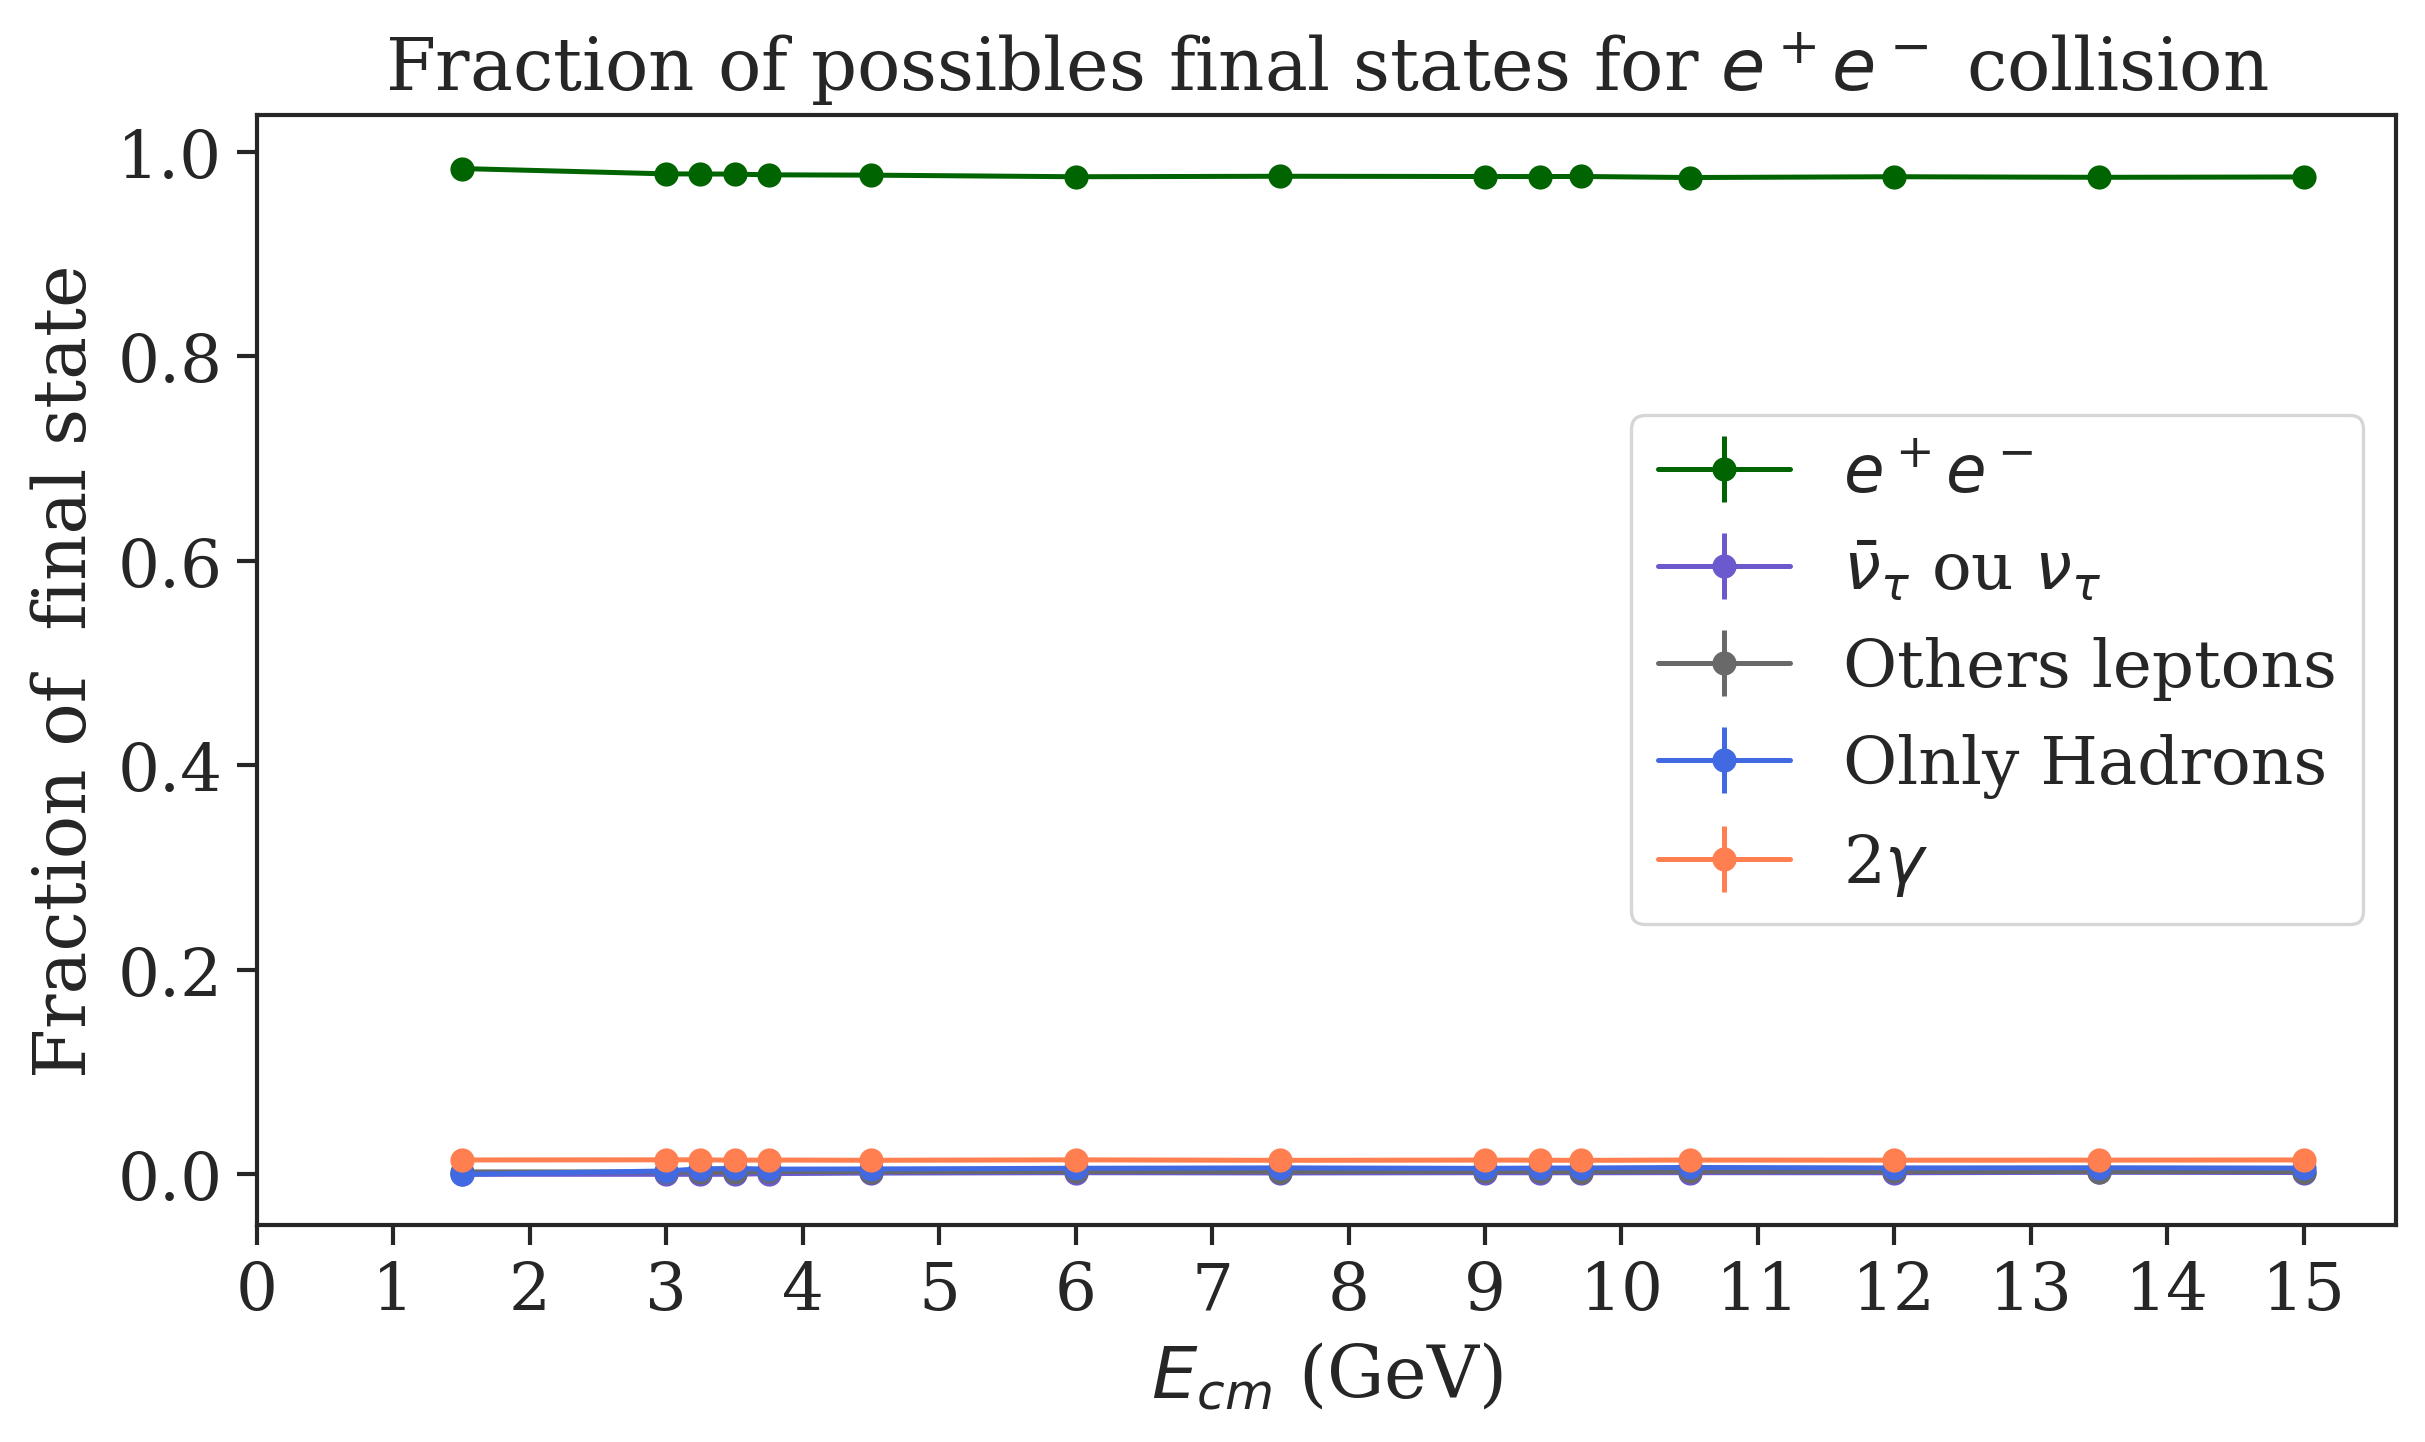

In [54]:
energy = [1.5,3,3.25,3.5,3.75,4.5,6,7.5,9,9.4,9.7,10.5,12,13.5,15]
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
colors = ['darkgreen','slateblue','dimgrey','royalblue','coral']
i=0
for key in eDict[0]:
        f_state = final_state(eDict,key)
        #plt.plot(energy,final_state(eDict,key), marker = 'o', color = colors[i], lw = 2.5, ms = 5, label = key)
        plt.errorbar(x = energy,y = f_state, xerr = None, yerr = np.sqrt(f_state/1e5), color = colors[i], marker ='o', label = key)
        i += 1

plt.title(r'Fraction of possibles final states for $e^+e^-$ collision')
plt.xlabel(r'$E_{cm}$ (GeV)')
plt.ylabel(r'Fraction of  final state')
plt.xticks(range(0,16))
plt.legend(bbox_to_anchor=(1, 0.5), loc='center right')
#plt.yscale('log')
plt.show()

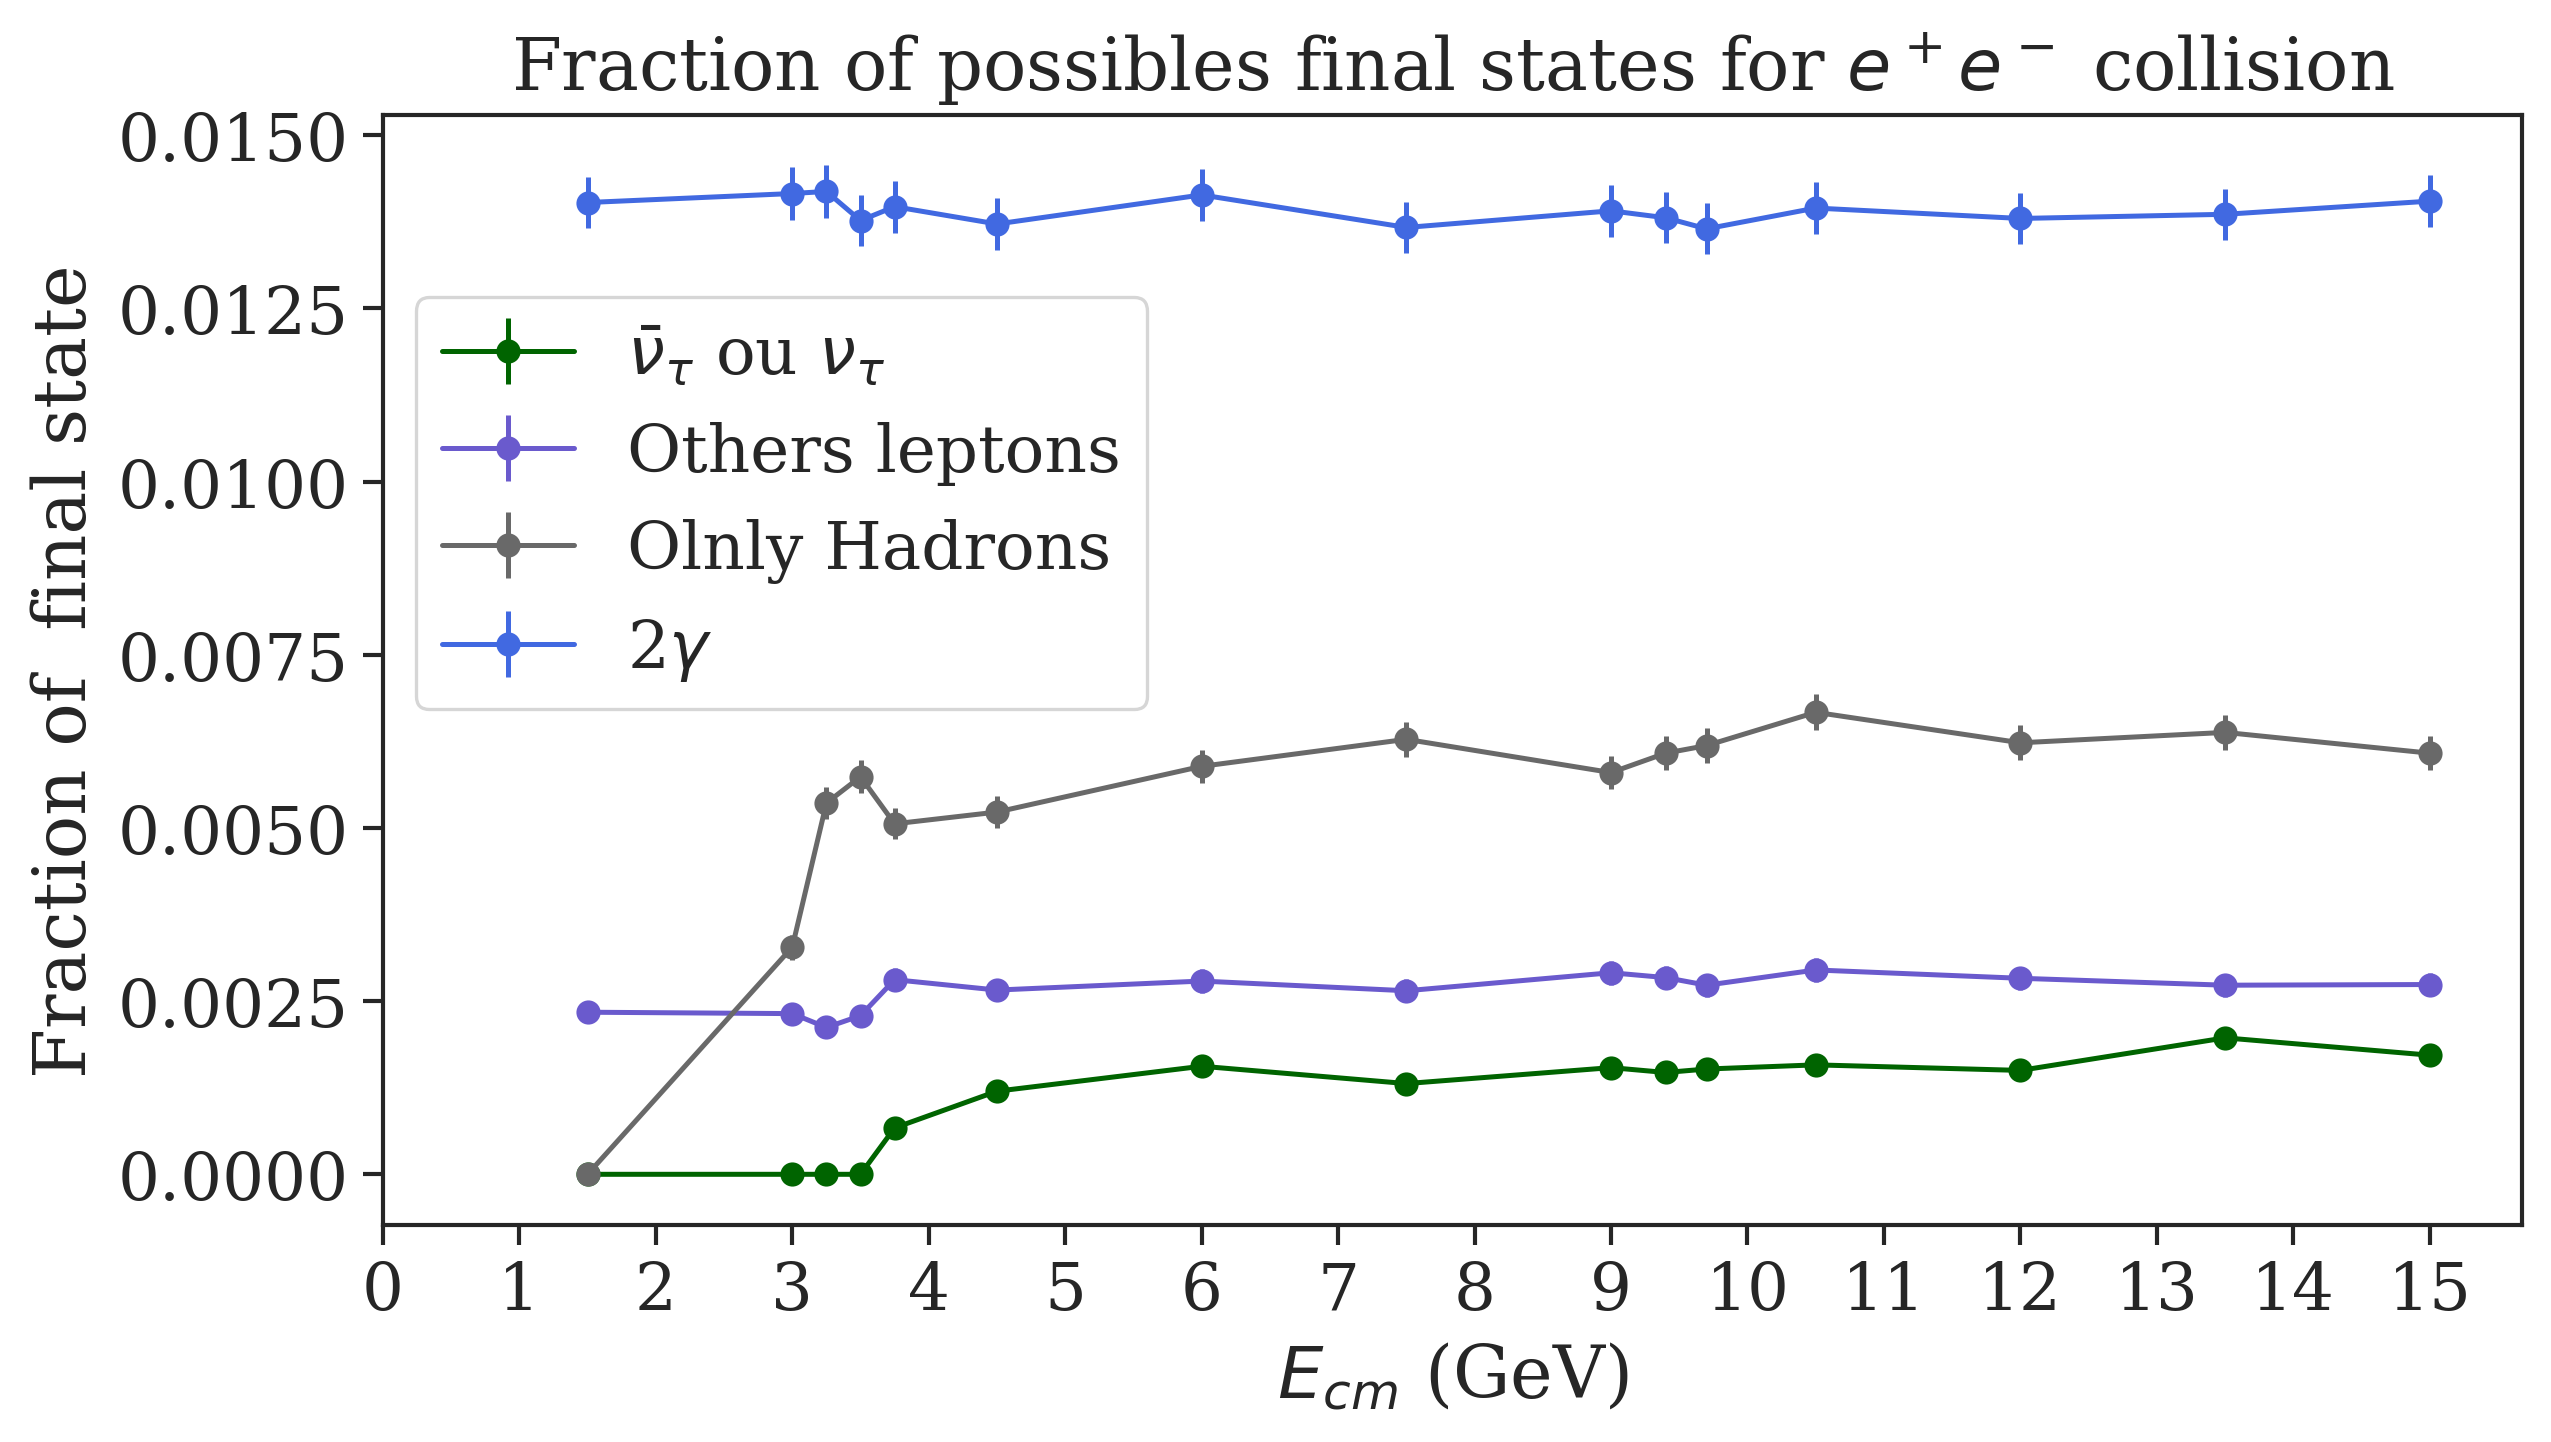

In [52]:
energy = [1.5,3,3.25,3.5,3.75,4.5,6,7.5,9,9.4,9.7,10.5,12,13.5,15]
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
colors = ['darkgreen','slateblue','dimgrey','royalblue','coral']
i=0
for key in eDict[0]:
    if key != '$e^+$$e^-$':
        f_state = final_state(eDict,key)
        plt.errorbar(x = energy,y = f_state, xerr = None, yerr = np.sqrt(f_state/1e5), color = colors[i], marker ='o', label = key)
        #plt.plot(energy,final_state(eDict,key), marker = 'o', color = colors[i], lw = 2.5, ms = 5, label = key)
        i += 1

plt.title(r'Fraction of possibles final states for $e^+e^-$ collision')
plt.xlabel(r'$E_{cm}$ (GeV)')
plt.ylabel(r'Fraction of  final state')
plt.xticks(range(0,16))
plt.legend(bbox_to_anchor=(-0.0, 0.65), loc='center left')
#plt.yscale('log')
plt.show()